**Tim Sudah Saatnya**
1. Erlin Shofiana
2. Aulia Mirfah Setyo Ayu Damayanti
3. Fitri Hartanti

In [52]:
# Import dataset
import pandas as pd
df = pd.read_csv("C:/Users/Lenovo/Downloads/The AI Employment Risk Index.csv")
df

,Job titles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain,Country,Salary
0,General Clerk,0.90,242,1903,0.127168,Hospitality,Singapore,260.00
1,Adjunct Instructor,0.05,1174,4677,0.251016,Supply Chain & Logistics,Cambodia,580.00
2,Technical Analyst,0.25,836,2289,0.365225,Law Enforcement,Vietnam,556.25
3,Geoscientist,0.30,127,1382,0.091896,Sales & Marketing,Philippines,550.00
4,Bricklayer,0.85,3,30,0.100000,Construction,Singapore,290.00
...,...,...,...,...,...,...,...,...
4701,Curriculum Specialist,0.60,164,1213,0.135202,Communication & PR,Singapore,440.00
4702,Network Systems Engineer,0.55,141,1049,0.134414,Law Enforcement,Malaysia,458.75
4703,Utility Engineer,0.20,135,1143,0.118110,Communication & PR,Laos,560.00
4704,Quality Control,0.20,213,1801,0.118268,Supply Chain & Logistics,Laos,560.00


In [53]:
# Melihat jumlah unique value pada kolom 'Job titles'
df["Job titles"].nunique()

4706

In [54]:
# Menghapus kolom 'Job title'
df = df.drop(columns=['Job titles'])
df = df.drop(columns=['Tasks'])
df = df.drop(columns=['AI models'])

### Cek Missing Value

In [55]:
# Melihat jumlah mising value
df.isna().sum()

AI Impact            0
AI_Workload_Ratio    0
Domain               0
Country              0
Salary               0
dtype: int64

In [56]:
# Melihat jumlah dari setiap value pada kolom 'Domain'
df["Domain"].value_counts()

Domain
Supply Chain & Logistics     471
Medical & Healthcare         471
Leadership & Strategy        471
Communication & PR           471
Administrative & Clerical    471
Data & IT                    471
Hospitality                  470
Law Enforcement              470
Sales & Marketing            470
Construction                 470
Name: count, dtype: int64

In [57]:
# Melihat jumlah dari setiap value pada kolom 'Country'
df["Country"].value_counts()

Country
Cambodia       759
Laos           754
Malaysia       558
Philippines    524
Singapore      486
Myanmar        452
Vietnam        443
Thailand       437
Indonesia      293
Name: count, dtype: int64

### Category AI Impact

In [58]:
# Membuat kategori baru untuk kolom 'AI Impact'
df['AI Impact Category'] = pd.cut(df['AI Impact'],
                                  bins=[0, 0.3, 0.6, 1],  # Batas-batas kategori
                                  labels=['less impact', 'medium impact', 'high impact'],
                                  right=False)  # right=False ensures that the bin includes the left edge, not the right


In [59]:
x=df[df["AI Impact Category"]=="less impact"]
x["Country"].value_counts()

Country
Cambodia       759
Laos           754
Myanmar        452
Vietnam        443
Philippines     29
Name: count, dtype: int64

In [60]:
x=df[df["AI Impact Category"]=="medium impact"]
x["Country"].value_counts()

Country
Malaysia       558
Philippines    495
Thailand       437
Indonesia      293
Singapore        6
Name: count, dtype: int64

In [61]:
x=df[df["AI Impact Category"]=="high impact"]
x["Country"].value_counts()

Country
Singapore    480
Name: count, dtype: int64

### EDA

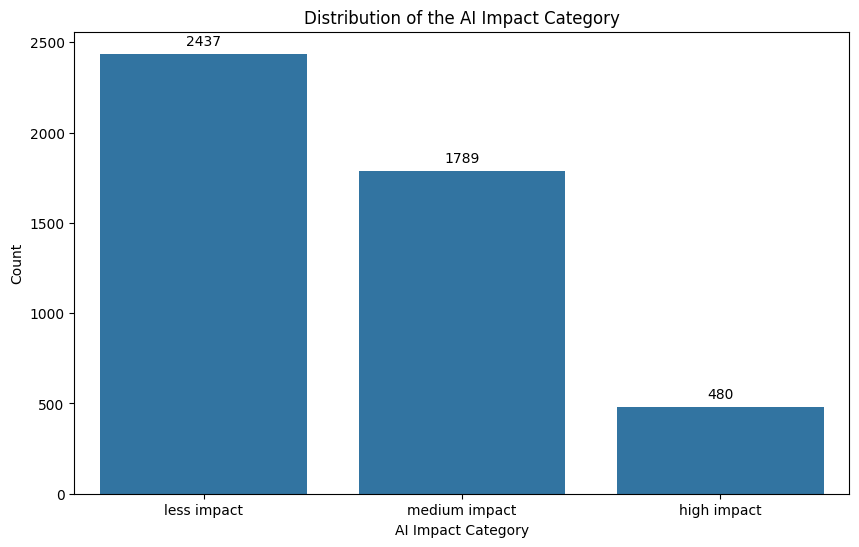

In [62]:
# Melihat distribusi dari 'AI Impact Category'
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='AI Impact Category', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title("Distribution of the AI Impact Category")
plt.xlabel("AI Impact Category")
plt.ylabel("Count")
plt.show()

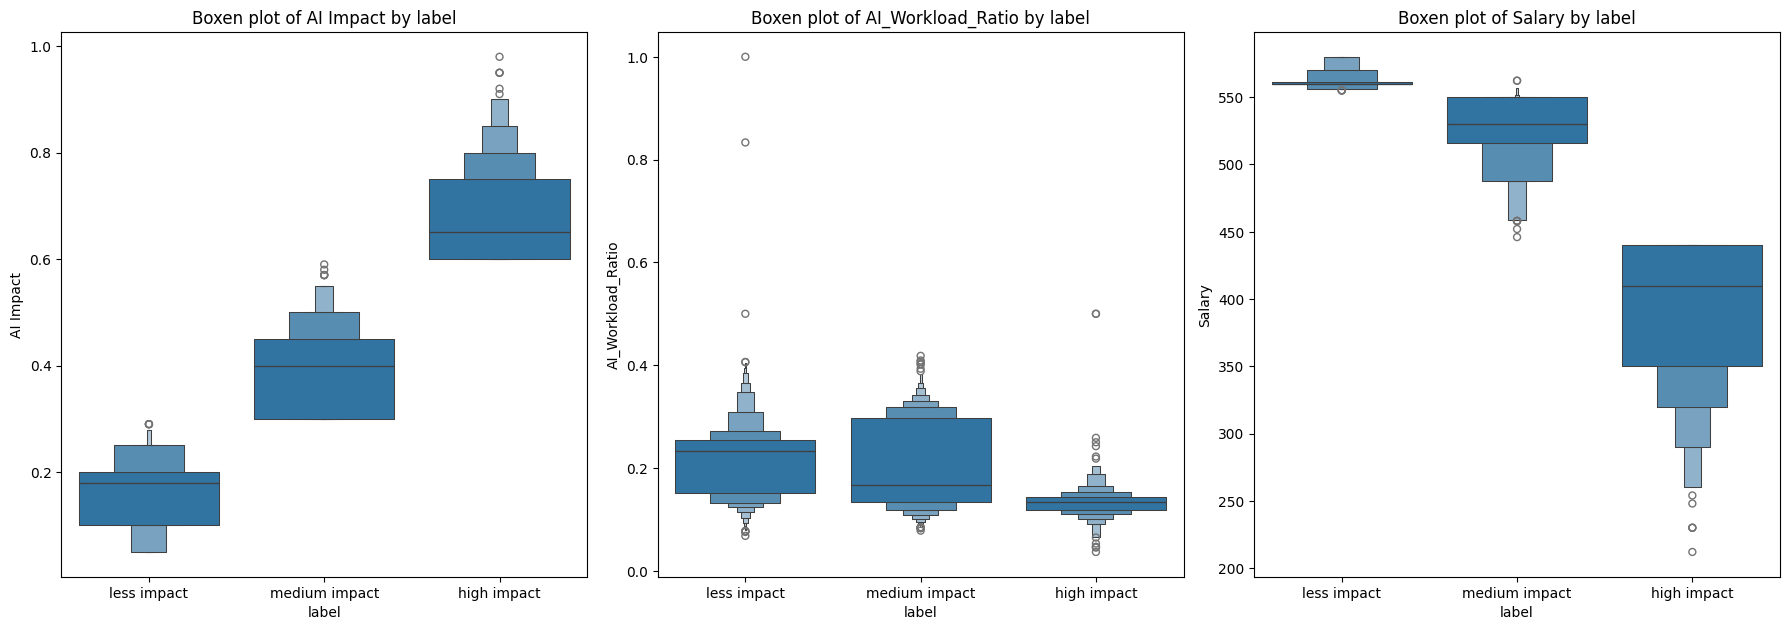

In [63]:
# Memilih kolom yang bertipe numerik
numeric_vars = df.select_dtypes(include=['number'])

# Membuat boxen plots untuk setiap variabel numerik
plt.figure(figsize=(18, 12))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxenplot(x='AI Impact Category', y=var, data=df)
    plt.title(f'Boxen plot of {var} by label')
    plt.xlabel('label')
    plt.ylabel(var)
    plt.tight_layout()

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26776\4090243822.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['AI Impact Category', var], dropna=False).size().unstack(fill_value=0)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26776\4090243822.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['AI Impact Category', var], dropna=False).size().unstack(fill_value=0)


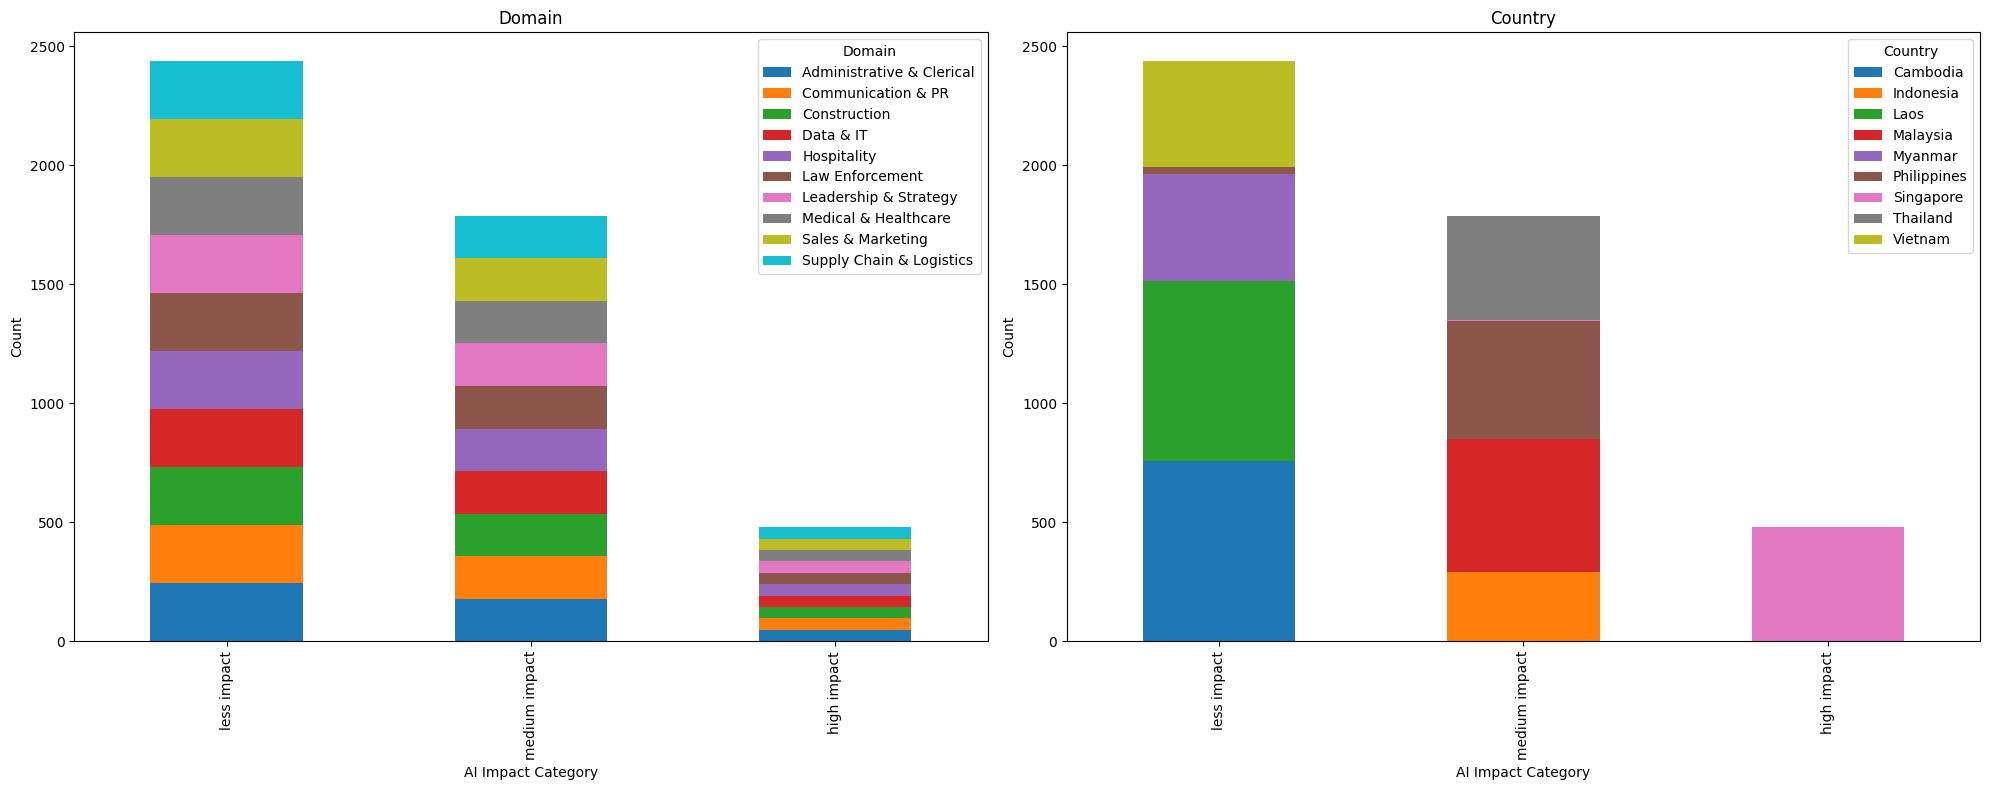

In [64]:
# Select categorical columns from df excluding 'label'
categorical_vars = df.select_dtypes(include=['object']).columns
categorical_vars = categorical_vars[categorical_vars != 'AI Impact Category']  # Exclude 'label'

# Create subplots based on the number of categorical variables
fig, axes = plt.subplots((len(categorical_vars) + 1) // 2, 2, figsize=(20, len(categorical_vars) * 4))
axes = axes.flatten()

# Plot stacked bar chart for each categorical variable
for i, var in enumerate(categorical_vars):
    if var in df.columns:
        # Count occurrences including NaN
        counts = df.groupby(['AI Impact Category', var], dropna=False).size().unstack(fill_value=0)
        counts.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_title(var)
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel('AI Impact Category')
    else:
        axes[i].axis('off')

# Turn off any remaining empty axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


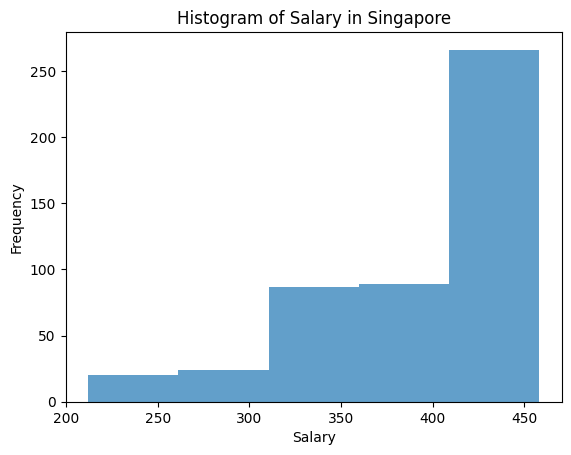

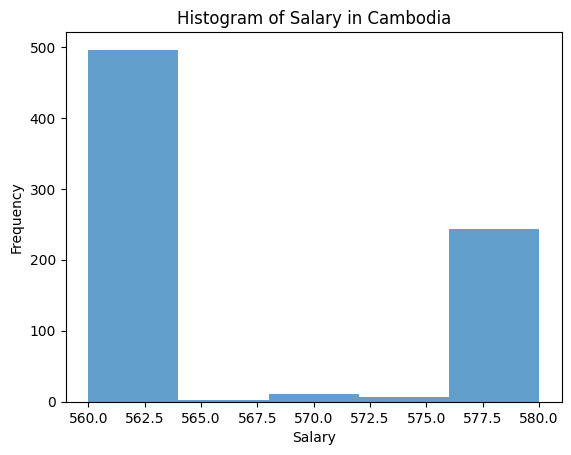

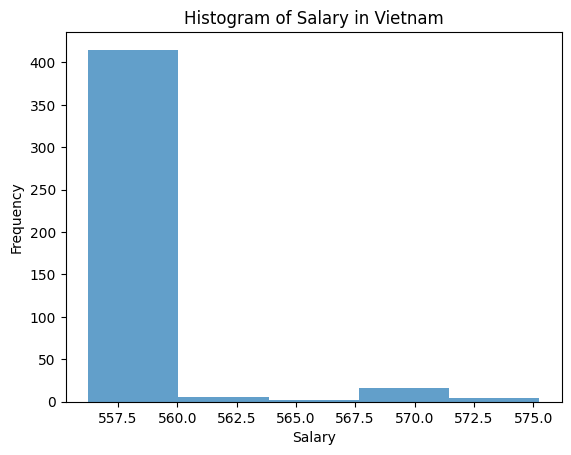

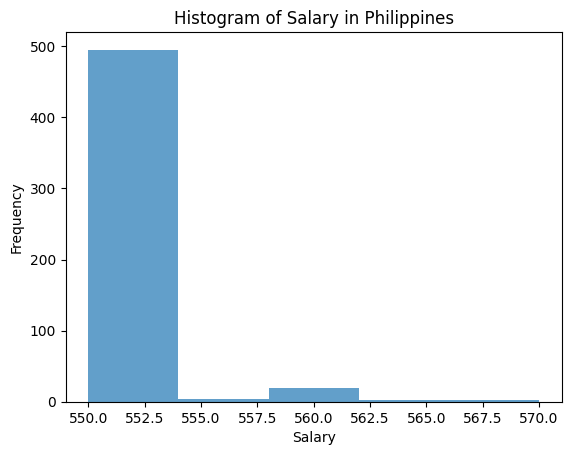

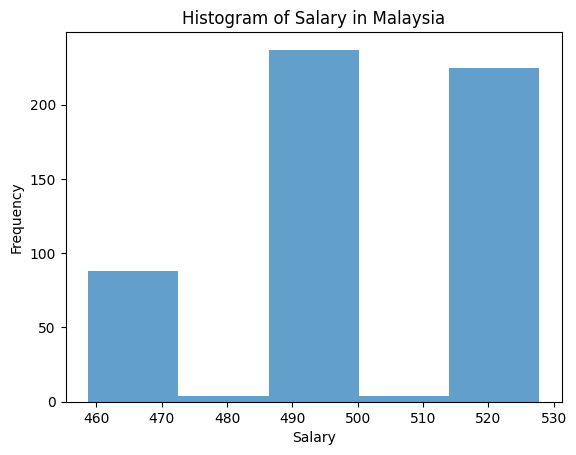

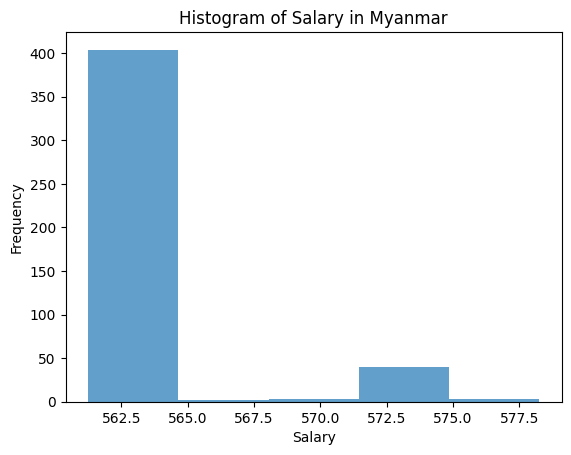

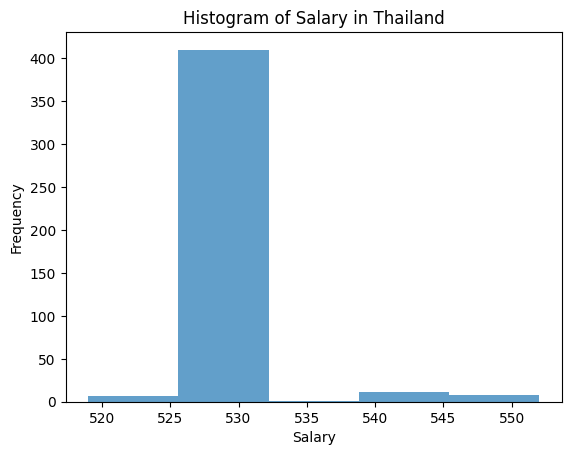

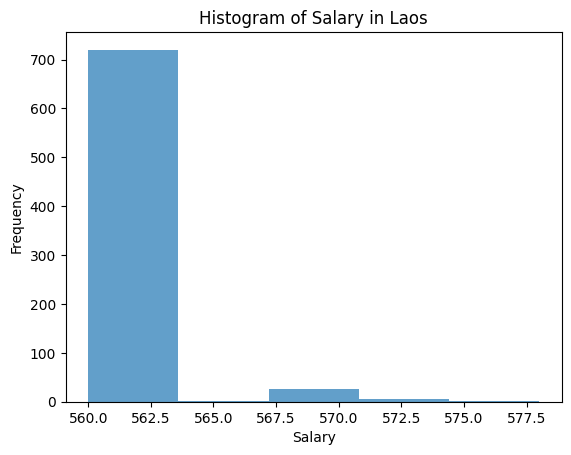

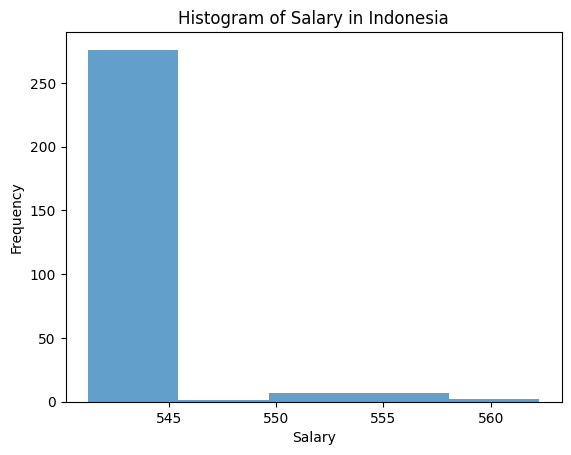

In [65]:
countries = df['Country'].unique()  # Mendapatkan daftar unik negara

for country in countries:
    # Filter data berdasarkan negara
    subset = df[df['Country'] == country]
    
    # Membuat histogram untuk Salary pada negara tertentu
    plt.hist(subset['Salary'], bins=5, alpha=0.7, label=country)
    
    # Mengatur judul dan label
    plt.title(f'Histogram of Salary in {country}')
    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    
    # Menampilkan histogram
    plt.show()

In [66]:
# Deskripsi kolom 'AI_Workload_Ratio'
df["AI_Workload_Ratio"].describe()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    4706.000000
mean             inf
std              NaN
min         0.036585
25%         0.137271
50%         0.199281
75%         0.260572
max              inf
Name: AI_Workload_Ratio, dtype: float64

In [67]:
# Melihat baris dengan value 'AI_Workload_Ratio' lebih dari 1
import numpy as np
df[df["AI_Workload_Ratio"]>1]

,AI Impact,AI_Workload_Ratio,Domain,Country,Salary,AI Impact Category
743,0.2,inf,Administrative & Clerical,Laos,560.0,less impact
1326,0.2,inf,Supply Chain & Logistics,Laos,560.0,less impact
2411,0.2,inf,Medical & Healthcare,Laos,560.0,less impact
2701,0.2,inf,Law Enforcement,Laos,560.0,less impact
3137,0.2,inf,Construction,Laos,560.0,less impact
3738,0.2,inf,Medical & Healthcare,Laos,560.0,less impact
4508,0.2,inf,Data & IT,Laos,560.0,less impact


### Prepo

In [68]:
# Mengubah nilai infinity pada kolom 'AI_Workload_Ratio' menjadi NaN
df['AI_Workload_Ratio'] = df['AI_Workload_Ratio'].replace([float('inf')], np.nan)

In [69]:
# Menerapkan encode value pada 'AI_Impact_Categori'
def encode_label(label):
    if label == 'less impact':
        return 0
    elif label == 'medium impact':
        return 1
    elif label == 'high impact':
        return 2
   
# Terapkan fungsi pada kolom 'label'
df['AI Impact Category'] = df['AI Impact Category'].apply(encode_label)

In [70]:
# Membuat kategori baru untuk kolom 'salary'

median_salary = df.groupby('Country')['Salary'].median().reset_index()
median_salary.columns = ['Country', 'Median_Salary']

# Menggabungkan median salary dengan DataFrame asli
df = pd.merge(df, median_salary, on='Country')

# Membuat kolom baru untuk mengkategorikan salary
df['Salary_Category'] = df.apply(lambda row: 'Above Median' if row['Salary'] > row['Median_Salary'] else 'Below Median', axis=1)
df = df.drop(columns=['Median_Salary'])
df = df.drop(columns=['Salary'])

In [71]:
df

,AI Impact,AI_Workload_Ratio,Domain,Country,AI Impact Category,Salary_Category
0,0.90,0.127168,Hospitality,Singapore,2,Below Median
1,0.05,0.251016,Supply Chain & Logistics,Cambodia,0,Above Median
2,0.25,0.365225,Law Enforcement,Vietnam,0,Below Median
3,0.30,0.091896,Sales & Marketing,Philippines,1,Below Median
4,0.85,0.100000,Construction,Singapore,2,Below Median
...,...,...,...,...,...,...
4701,0.60,0.135202,Communication & PR,Singapore,2,Above Median
4702,0.55,0.134414,Law Enforcement,Malaysia,1,Below Median
4703,0.20,0.118110,Communication & PR,Laos,0,Below Median
4704,0.20,0.118268,Supply Chain & Logistics,Laos,0,Below Median


In [72]:
x=df[df["AI Impact Category"]==0]
x["Salary_Category"].value_counts()

Salary_Category
Below Median    2035
Above Median     402
Name: count, dtype: int64

In [73]:
x=df[df["AI Impact Category"]==1]
x["Salary_Category"].value_counts()

Salary_Category
Below Median    1506
Above Median     283
Name: count, dtype: int64

In [74]:
x=df[df["AI Impact Category"]==2]
x["Salary_Category"].value_counts()

Salary_Category
Below Median    305
Above Median    175
Name: count, dtype: int64

In [17]:
# Melihat jumlah missing value
df.isna().sum()

AI Impact             0
Tasks                 0
AI models             0
AI_Workload_Ratio     7
Domain                0
Country               0
AI Impact Category    0
Salary_Category       0
dtype: int64

### Splitting

In [75]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, LabelEncoder


X = df.drop(columns=[('AI Impact Category'),('AI Impact')])  
y = df['AI Impact Category']  # Menyimpan label dalam variabel y

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)


In [76]:
# Melihat jumlah missing value
X_test.isna().sum()

AI_Workload_Ratio    2
Domain               0
Country              0
Salary_Category      0
dtype: int64

In [77]:

categorical_columns = X_train.select_dtypes(include=['object']).columns
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

categorical_preprocessor = Pipeline(steps=[
   # ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Tambahkan OneHotEncoder di sini
])
less_impact = df[df["AI Impact Category"]==0]
replace = less_impact["AI_Workload_Ratio"].mean()

numeric_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=replace)),  # Mengisi nilai hilang dengan 'replace'
    # ('scaler', StandardScaler())  # StandardScaler untuk scaling
])

# Menggabungkan preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_preprocessor, numeric_columns),
        ('cat', categorical_preprocessor, categorical_columns)
    ])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0.21505850950047894,
                                                                strategy='constant'))]),
                                 Index(['AI_Workload_Ratio'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Domain', 'Country', 'Salary_Category'], dtype='object'))])

In [78]:
# Transformasi data dengan pipeline
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Mendapatkan nama kolom
numeric_feature_names = numeric_columns
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_columns)

# Gabungkan nama kolom
all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

all_feature_names

['AI_Workload_Ratio',
 'Domain_Administrative & Clerical',
 'Domain_Communication & PR',
 'Domain_Construction',
 'Domain_Data & IT',
 'Domain_Hospitality',
 'Domain_Law Enforcement',
 'Domain_Leadership & Strategy',
 'Domain_Medical & Healthcare',
 'Domain_Sales & Marketing',
 'Domain_Supply Chain & Logistics',
 'Country_Cambodia',
 'Country_Indonesia',
 'Country_Laos',
 'Country_Malaysia',
 'Country_Myanmar',
 'Country_Philippines',
 'Country_Singapore',
 'Country_Thailand',
 'Country_Vietnam',
 'Salary_Category_Above Median',
 'Salary_Category_Below Median']

In [79]:
# Membuat DataFrame dengan nama kolom
X_train_final = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_test_final = pd.DataFrame(X_test_processed, columns=all_feature_names)

# Output hasil preprocessing akhir
print("X_train_final shape:", X_train_final.shape)
print("X_test_final shape:", X_test_final.shape)

X_train_final shape: (3764, 22)
X_test_final shape: (942, 22)


In [23]:
X_train_final.isna().sum()

Tasks                               0
AI models                           0
AI_Workload_Ratio                   0
Domain_Administrative & Clerical    0
Domain_Communication & PR           0
Domain_Construction                 0
Domain_Data & IT                    0
Domain_Hospitality                  0
Domain_Law Enforcement              0
Domain_Leadership & Strategy        0
Domain_Medical & Healthcare         0
Domain_Sales & Marketing            0
Domain_Supply Chain & Logistics     0
Country_Cambodia                    0
Country_Indonesia                   0
Country_Laos                        0
Country_Malaysia                    0
Country_Myanmar                     0
Country_Philippines                 0
Country_Singapore                   0
Country_Thailand                    0
Country_Vietnam                     0
Salary_Category_Above Median        0
Salary_Category_Below Median        0
dtype: int64

### Modelling

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

#Lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from lime.lime_text import IndexedString,IndexedCharacters
from lime.lime_base import LimeBase
from lime.lime_text import explanation

kf = KFold(n_splits=5, random_state = 42, shuffle = True)

### Cross Validation

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # Pipeline for imbalanced-learn
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


def train_model(model, X_train, y_train):
   
    text_clf = ImbPipeline([
        ('clf', model)  # Classifier
    ])
    return text_clf

def train_model_comparison(models, X_train, y_train, kf):
    results = []
    
    for name, model in models.items():
     
        text_clf = train_model(model, X_train, y_train)
        
        # Compute cross-validated scores
        cv_scores = cross_val_score(text_clf, X_train, y_train, cv=kf)
        train_acc = cv_scores.mean()
        
        results.append([name, train_acc])

    # Create DataFrame for results
    df_results = pd.DataFrame(results, columns=['Model', 'Cross-Val Train Accuracy'])
    df_results_sorted = df_results.sort_values(by='Cross-Val Train Accuracy', ascending=False)

    return df_results_sorted

# Example model candidates
models = {

    
    'SVM': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Extra Tree': ExtraTreesClassifier(random_state=26),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
}



kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = train_model_comparison(models, X_train_final, y_train, kf)
print(results)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default)

                 Model  Cross-Val Train Accuracy
0                  SVM                  0.998672
1              XGBoost                  0.998406
6        Decision Tree                  0.997343
2           Extra Tree                  0.997078
3  K-Nearest Neighbors                  0.996016
4          Naive Bayes                  0.992828
5             AdaBoost                  0.992828


In [82]:

model =   XGBClassifier(random_state=42)
model.fit(X_train_final, y_train)

y_pred =model.predict(X_test_final)
print(classification_report(y_pred, y_test,digits=6))

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000       488
           1   0.997207  1.000000  0.998601       357
           2   1.000000  0.989691  0.994819        97

    accuracy                       0.998938       942
   macro avg   0.999069  0.996564  0.997807       942
weighted avg   0.998941  0.998938  0.998936       942



### Feature Importance

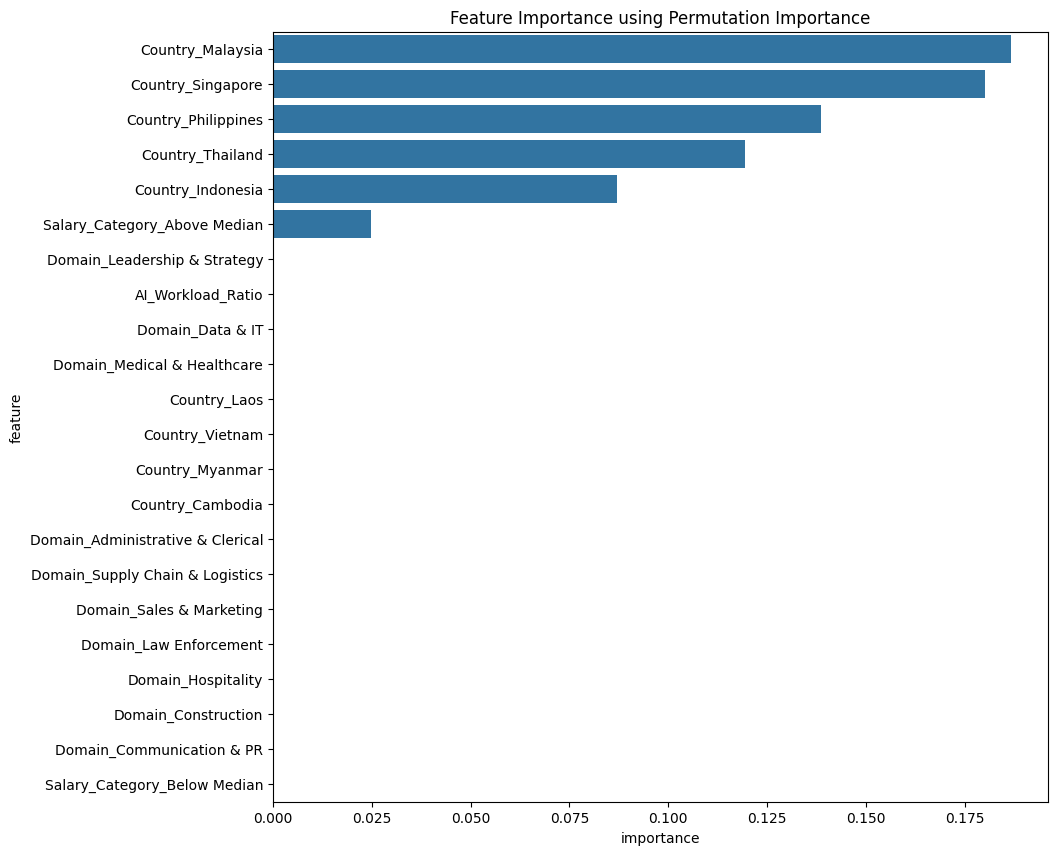

In [83]:
from sklearn.inspection import permutation_importance

# Hitung permutasi imporantasi
result = permutation_importance(model, X_test_final, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Mengubah hasil ke dalam DataFrame
feature_importance_df = pd.DataFrame({'feature': X_test_final.columns, 'importance': result.importances_mean})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot imporantasi fitur
plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance using Permutation Importance')
plt.show()


In [28]:
feature_importance_df

,feature,importance
16,Country_Malaysia,0.184926
19,Country_Singapore,0.173036
18,Country_Philippines,0.138429
20,Country_Thailand,0.118896
14,Country_Indonesia,0.086412
22,Salary_Category_Above Median,0.024841
1,AI models,0.000212
0,Tasks,0.000000
21,Country_Vietnam,0.000000
17,Country_Myanmar,0.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26776\444142832.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Country', y='AI Impact', data=df, palette="coolwarm")


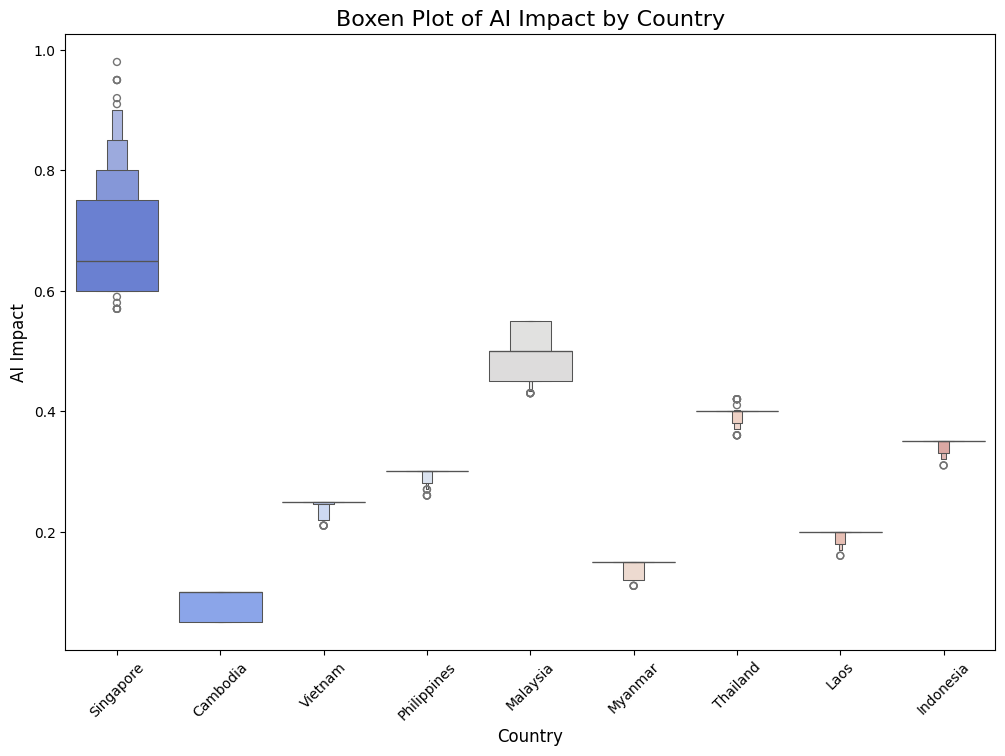

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure dan axis
plt.figure(figsize=(12, 8))

# Membuat boxen plot
sns.boxenplot(x='Country', y='AI Impact', data=df, palette="coolwarm")

# Menambahkan judul dan label
plt.title('Boxen Plot of AI Impact by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('AI Impact', fontsize=12)

# Memutar label di sumbu x agar tidak saling tumpang tindih
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26776\3229398710.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI Impact', y='Job titles', data=top_10_impacted_jobs, palette='cividis')


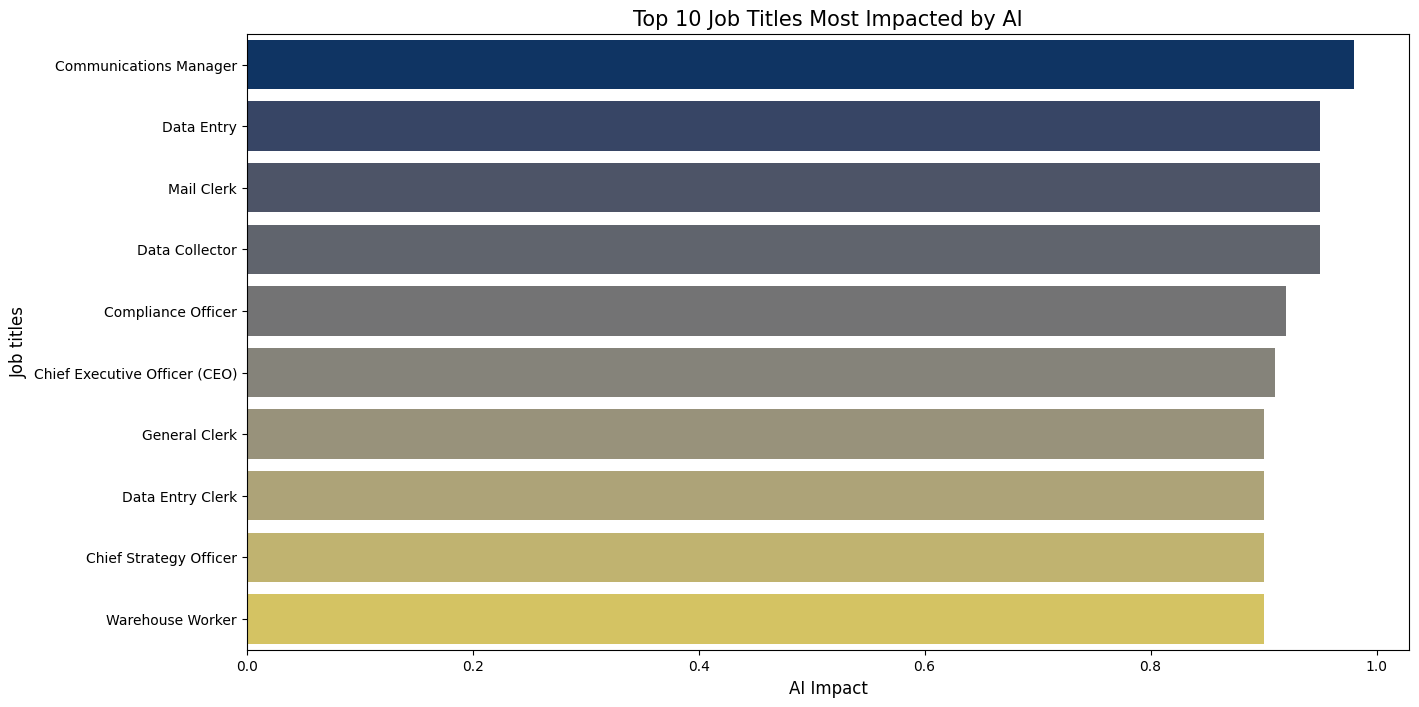

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
df = pd.read_csv("C:/Users/Lenovo/Downloads/The AI Employment Risk Index.csv")
df_sing = df[df["Country"]=="Singapore"]


top_10_impacted_jobs = df_sing.sort_values(by='AI Impact', ascending=False).head(10)

# Plotting the top 10 impacted jobs
plt.figure(figsize=(15, 8))
sns.barplot(x='AI Impact', y='Job titles', data=top_10_impacted_jobs, palette='cividis')
plt.title('Top 10 Job Titles Most Impacted by AI', fontsize=15)
plt.xlabel('AI Impact', fontsize=12)
plt.ylabel('Job titles', fontsize=12)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26776\2350177169.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI Impact', y='Job titles', data=top_10_impacted_jobs, palette='cividis')


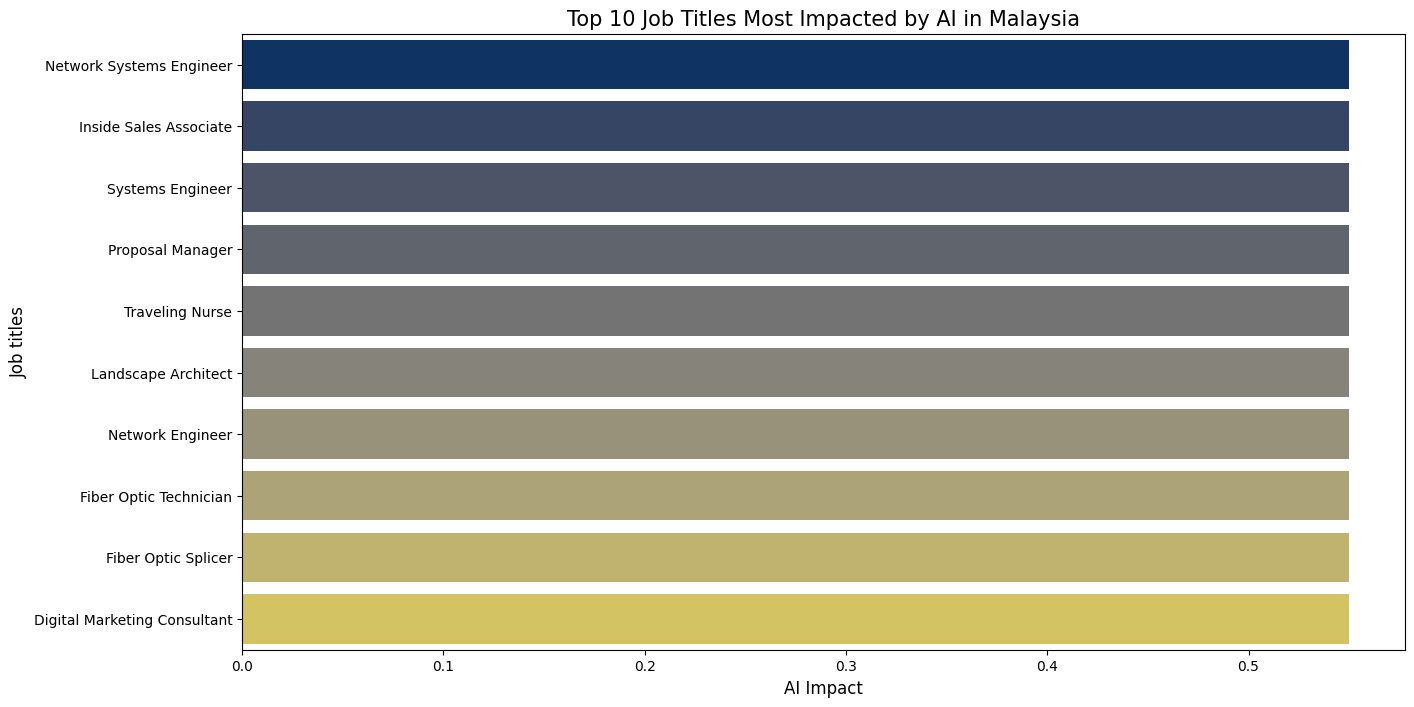

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
df = pd.read_csv("C:/Users/Lenovo/Downloads/The AI Employment Risk Index.csv")
df_sing = df[df["Country"]=="Malaysia"]


top_10_impacted_jobs = df_sing.sort_values(by='AI Impact', ascending=False).head(10)

# Plotting the top 10 impacted jobs
plt.figure(figsize=(15, 8))
sns.barplot(x='AI Impact', y='Job titles', data=top_10_impacted_jobs, palette='cividis')
plt.title('Top 10 Job Titles Most Impacted by AI in Malaysia', fontsize=15)
plt.xlabel('AI Impact', fontsize=12)
plt.ylabel('Job titles', fontsize=12)
plt.show()